In [ ]:
# Instalando os pacotes dependentes do sistema
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')
install.packages('sf')
install.packages('ggspatial')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘jpeg’, ‘png’, ‘sp’, ‘rgdal’, ‘rjson’, ‘plyr’, ‘prettymapr’, ‘rosm’, ‘abind’




In [ ]:
# Instalando os demais pacotes
install.packages(c("gridExtra","GoodmanKruskal","FactoMineR","readxl","lubridate","fastDummies", "dendextend", "caret",
"e1071","rpart","randomForest"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘matrixStats’, ‘RcppArmadillo’, ‘lava’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘prodlim’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘jquerylib’, ‘promises’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘corrplot’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’, ‘viridis’, ‘foreach’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [ ]:
# Carregando os pacotes e configurado o ambiente
library(tidyverse)
library(gridExtra)
library(GoodmanKruskal)
library(FactoMineR)
library(readxl)
library(lubridate)
library(fastDummies)
library(dendextend)
library(caret)
library(e1071)
library(rpart)
library(randomForest)
library(sf)
library(ggspatial)
options(scipen = 999, digits = 2)

In [ ]:
acidentes01 <- read.csv2("/content/acidentes01.csv", encoding = "UTF-8")
acidentes02 <- read.csv2("/content/acidentes02.csv", encoding = "UTF-8")
acidentes03 <- read.csv2("/content/acidentes03.csv", encoding = "UTF-8")
acidentes04 <- read.csv2("/content/acidentes04.csv", encoding = "UTF-8")

In [ ]:
acidentes01[,c(1,26:30)] <- lapply(acidentes01[,c(1,26:30)], function(x){as.character(x)})
acidentes02[,c(1,6,26:30)] <- lapply(acidentes02[,c(1,6,26:30)], function(x){as.character(x)})
acidentes03[,c(1,6,26:30)] <- lapply(acidentes03[,c(1,6,26:30)], function(x){as.character(x)})
acidentes04[,c(1,6,26:27)] <- lapply(acidentes04[,c(1,6,26:27)], function(x){as.character(x)})

In [ ]:
acidentes01$km <- as.numeric(acidentes01$km)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
acidentes <- bind_rows(acidentes01, acidentes02, acidentes03, acidentes04)

In [ ]:
head(acidentes) #nao remover NAs pois ainda ha muitas informacoes uteis / base nao tem dados para certa data

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,⋯,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,10,11/06/2007,Segunda,15:30:00,MG,381,NA,OLIVEIRA,Falta de atenção,Colisão frontal,⋯,0,5,0,4,6,NA,NA,NA,NA,NA
2,10,11/06/2007,Segunda,15:30:00,MG,381,NA,OLIVEIRA,Falta de atenção,Colisão frontal,⋯,0,5,0,4,6,NA,NA,NA,NA,NA
3,1032898,13/08/2007,Segunda,14:25:00,MG,40,NA,ITABIRITO,Outras,Saída de Pista,⋯,1,2,0,1,1,NA,NA,NA,NA,NA
4,1051130,12/02/2007,Segunda,02:10:00,MA,135,11,SAO LUIS,Animais na Pista,Atropelamento de animal,⋯,1,0,0,3,1,NA,NA,NA,NA,NA
5,1066824,20/11/2007,Terça,05:30:00,CE,222,NA,CAUCAIA,Defeito mecânico em veículo,Capotamento,⋯,0,0,0,1,1,NA,NA,NA,NA,NA
6,1069918,16/12/2007,Domingo,17:40:00,MA,230,14,BARAO DE GRAJAU,Outras,Capotamento,⋯,1,0,0,1,1,NA,NA,NA,NA,NA


In [ ]:
str(acidentes)

'data.frame':	1882953 obs. of  30 variables:
 $ id                    : chr  "10" "10" "1032898" "1051130" ...
 $ data_inversa          : chr  "11/06/2007" "11/06/2007" "13/08/2007" "12/02/2007" ...
 $ dia_semana            : chr  "Segunda" "Segunda" "Segunda" "Segunda" ...
 $ horario               : chr  "15:30:00" "15:30:00" "14:25:00" "02:10:00" ...
 $ uf                    : chr  "MG" "MG" "MG" "MA" ...
 $ br                    : chr  "381" "381" "40" "135" ...
 $ km                    : num  NA NA NA 11 NA 14 NA NA NA NA ...
 $ municipio             : chr  "OLIVEIRA" "OLIVEIRA" "ITABIRITO" "SAO LUIS" ...
 $ causa_acidente        : chr  "Falta de atenção" "Falta de atenção" "Outras" "Animais na Pista" ...
 $ tipo_acidente         : chr  "Colisão frontal" "Colisão frontal" "Saída de Pista" "Atropelamento de animal" ...
 $ classificacao_acidente: chr  "" "" "Com Vítimas Feridas" "Com Vítimas Fatais" ...
 $ fase_dia              : chr  "Pleno dia" "Pleno dia" "Pleno dia" "Plena noite"

In [ ]:
acidentes$km <- round(acidentes$km, digits = 0)

In [ ]:
acidentes$data_inversa <- as.Date(acidentes$data_inversa, "%d/%m/%Y")

In [ ]:
acidentes <- acidentes %>% mutate(ano = year(data_inversa), mes = month(data_inversa), hora = as.POSIXct(acidentes$horario, format = "%H:%M:%S"))

In [ ]:
acidentes$horario <- substring(acidentes$horario,1,2)

In [ ]:
acidentes <- acidentes %>% filter(classificacao_acidente != "")

In [ ]:
head(acidentes)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,⋯,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano,mes,hora
,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>
1,1032898,2007-08-13,Segunda,14,MG,40,NA,ITABIRITO,Outras,Saída de Pista,⋯,1,1,NA,NA,NA,NA,NA,2007,8,2021-09-02 14:25:00
2,1051130,2007-02-12,Segunda,02,MA,135,11,SAO LUIS,Animais na Pista,Atropelamento de animal,⋯,3,1,NA,NA,NA,NA,NA,2007,2,2021-09-02 02:10:00
3,1066824,2007-11-20,Terça,05,CE,222,NA,CAUCAIA,Defeito mecânico em veículo,Capotamento,⋯,1,1,NA,NA,NA,NA,NA,2007,11,2021-09-02 05:30:00
4,1069918,2007-12-16,Domingo,17,MA,230,14,BARAO DE GRAJAU,Outras,Capotamento,⋯,1,1,NA,NA,NA,NA,NA,2007,12,2021-09-02 17:40:00
5,1070971,2007-03-05,Segunda,08,PR,277,NA,CASCAVEL,Outras,Colisão lateral,⋯,0,2,NA,NA,NA,NA,NA,2007,3,2021-09-02 08:10:00
6,1137914,2007-08-12,Domingo,22,ES,101,NA,SERRA,Outras,Atropelamento de pessoa,⋯,1,1,NA,NA,NA,NA,NA,2007,8,2021-09-02 22:30:00


In [ ]:
tipo_acidentes <- read_excel("/content/acidentes_rotulos_corrigidos.xlsx", col_types = c("text", "text"), sheet = 1)
causa_acidentes <- read_excel("/content/acidentes_rotulos_corrigidos.xlsx", col_types = c("text", "text"), sheet = 2)

In [ ]:
head(tipo_acidentes)
head(causa_acidentes)

tipo_acidente,tipo_acidente_corrigido
<chr>,<chr>
Atropelamento de animal,Atropelamento de Animal
Atropelamento de Animal,Atropelamento de Animal
Atropelamento de Pedestre,Atropelamento de Pedestre
Atropelamento de pessoa,Atropelamento de Pedestre
Capotamento,Capotamento
Colisão com bicicleta,Colisão com bicicleta


causa_acidente,causa_acidente_corrigido
<chr>,<chr>
Acessar a via sem observar a presença dos outros veículos,Acessar a via sem observar a presença dos outros veículos
Acesso irregular,Acesso irregular
Acostamento em desnível,Acostamento em desnível
Acumulo de água sobre o pavimento,Acumulo de substâncias/Problemas no pavimento
Acumulo de areia ou detritos sobre o pavimento,Acumulo de substâncias/Problemas no pavimento
Acumulo de óleo sobre o pavimento,Acumulo de substâncias/Problemas no pavimento


In [ ]:
acidentes <- left_join(acidentes, causa_acidentes, by = "causa_acidente")
acidentes <- left_join(acidentes, tipo_acidentes, by = "tipo_acidente")

In [ ]:
head(acidentes)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,⋯,latitude,longitude,regional,delegacia,uop,ano,mes,hora,causa_acidente_corrigido,tipo_acidente_corrigido
,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
1,1032898,2007-08-13,Segunda,14,MG,40,NA,ITABIRITO,Outras,Saída de Pista,⋯,NA,NA,NA,NA,NA,2007,8,2021-09-02 14:25:00,Outras,Saída de Pista
2,1051130,2007-02-12,Segunda,02,MA,135,11,SAO LUIS,Animais na Pista,Atropelamento de animal,⋯,NA,NA,NA,NA,NA,2007,2,2021-09-02 02:10:00,Animais na Pista,Atropelamento de Animal
3,1066824,2007-11-20,Terça,05,CE,222,NA,CAUCAIA,Defeito mecânico em veículo,Capotamento,⋯,NA,NA,NA,NA,NA,2007,11,2021-09-02 05:30:00,Defeito Mecânico no Veículo,Capotamento
4,1069918,2007-12-16,Domingo,17,MA,230,14,BARAO DE GRAJAU,Outras,Capotamento,⋯,NA,NA,NA,NA,NA,2007,12,2021-09-02 17:40:00,Outras,Capotamento
5,1070971,2007-03-05,Segunda,08,PR,277,NA,CASCAVEL,Outras,Colisão lateral,⋯,NA,NA,NA,NA,NA,2007,3,2021-09-02 08:10:00,Outras,Colisão lateral
6,1137914,2007-08-12,Domingo,22,ES,101,NA,SERRA,Outras,Atropelamento de pessoa,⋯,NA,NA,NA,NA,NA,2007,8,2021-09-02 22:30:00,Outras,Atropelamento de Pedestre


In [ ]:
str(acidentes)

'data.frame':	1882927 obs. of  35 variables:
 $ id                      : chr  "1032898" "1051130" "1066824" "1069918" ...
 $ data_inversa            : Date, format: "2007-08-13" "2007-02-12" ...
 $ dia_semana              : chr  "Segunda" "Segunda" "Terça" "Domingo" ...
 $ horario                 : chr  "14" "02" "05" "17" ...
 $ uf                      : chr  "MG" "MA" "CE" "MA" ...
 $ br                      : chr  "40" "135" "222" "230" ...
 $ km                      : num  NA 11 NA 14 NA NA NA NA 372 NA ...
 $ municipio               : chr  "ITABIRITO" "SAO LUIS" "CAUCAIA" "BARAO DE GRAJAU" ...
 $ causa_acidente          : chr  "Outras" "Animais na Pista" "Defeito mecânico em veículo" "Outras" ...
 $ tipo_acidente           : chr  "Saída de Pista" "Atropelamento de animal" "Capotamento" "Capotamento" ...
 $ classificacao_acidente  : chr  "Com Vítimas Feridas" "Com Vítimas Fatais" "Com Vítimas Feridas" "Com Vítimas Feridas" ...
 $ fase_dia                : chr  "Pleno dia" "Plena n

In [ ]:
acidentes$dia_semana <- str_replace_all(acidentes$dia_semana, c("Sexta" = "sexta-feira", "Sábado" = "sábado",
"Domingo" = "domingo", "Segunda" = "segunda-feira", "Quinta" = "quinta-feira", "Quarta" = "quarta-feira",
"Terça" = "terça-feira"))

In [ ]:
acidentes$dia_semana <- str_replace_all(acidentes$dia_semana, c("segunda-feira" = "1.segunda-feira", "terça-feira" = "2.terça-feira",
"quarta-feira" = "3.quarta-feira", "quinta-feira" = "4.quinta-feira", "sexta-feira" = "5.sexta-feira", "sábado" = "6.sábado",
"domingo" = "7.domingo"))

Agregação e análise de dados

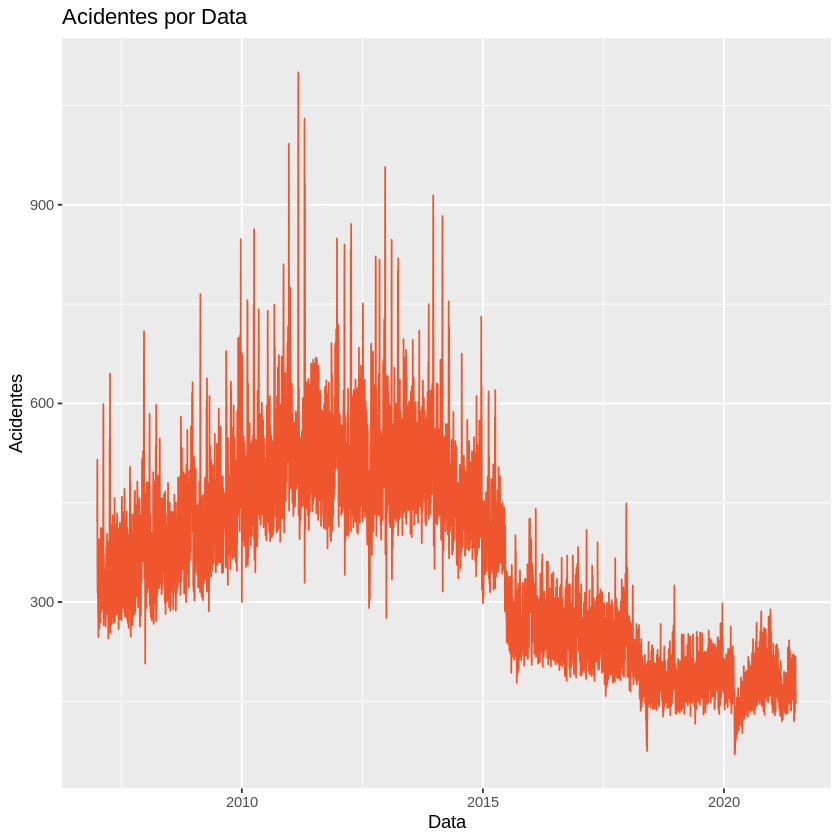

In [ ]:
acidentes %>% group_by(data_inversa) %>% summarise(acidentes = n()) %>% ggplot(aes(x = data_inversa, y = acidentes)) + geom_line(size = 0.5, colour = "#EF562D") +
labs(title = "Acidentes por Data", x = "Data", y = "Acidentes") + theme_gray()

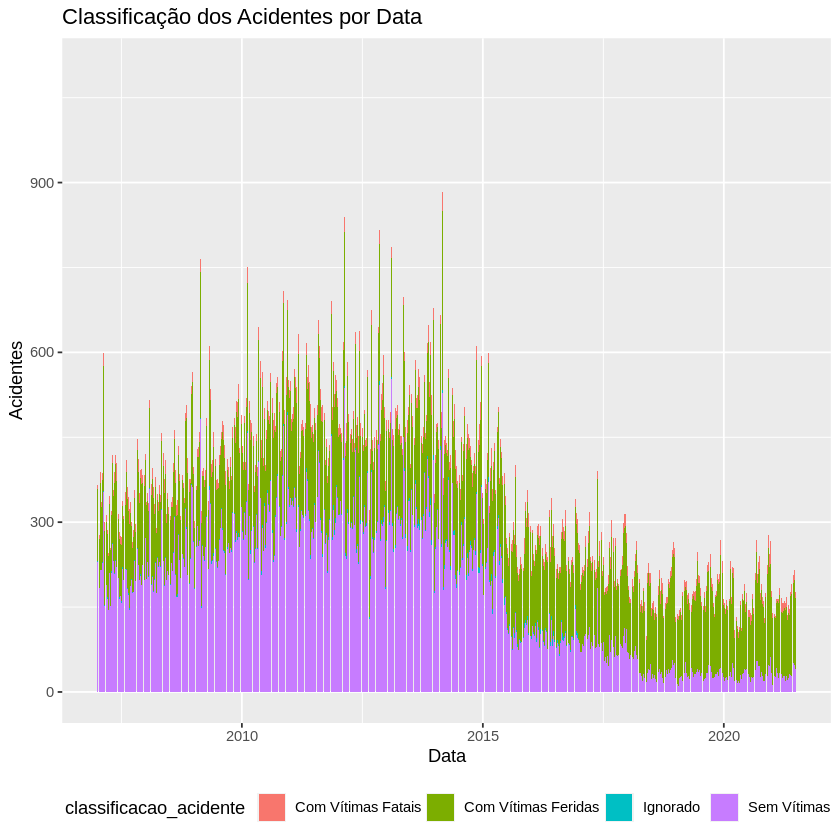

In [ ]:
acidentes %>%
 ggplot() +
  aes(x = data_inversa, fill = classificacao_acidente) +
  geom_bar() +
  scale_fill_hue(direction = 1) +
  theme_gray() +
  labs(title = "Classificação dos Acidentes por Data", x = "Data", y = "Acidentes") + theme(legend.position = "bottom")

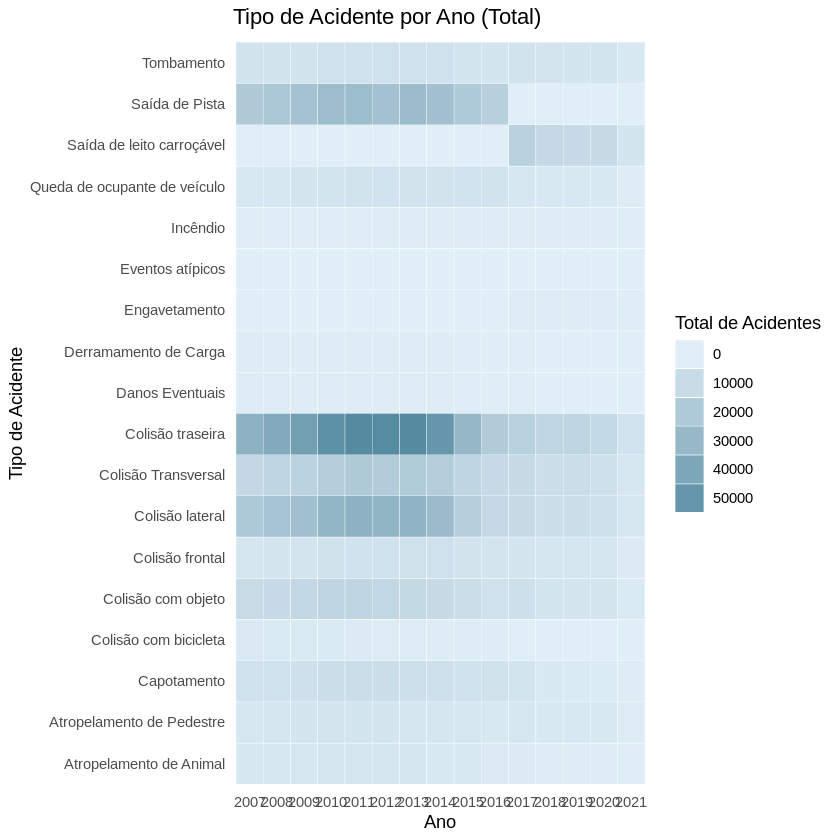

In [ ]:
table(acidentes$tipo_acidente_corrigido, acidentes$ano) %>% as.data.frame() %>%
ggplot(aes(Var2, Var1)) + geom_tile(aes(fill = Freq),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "#E0EEF7", high = "#548BA1") +  
  guides(fill=guide_legend(title="Total de Acidentes")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Tipo de Acidente por Ano (Total)",
       x = "Ano", y = "Tipo de Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

In [ ]:
acidentes %>% group_by(dia_semana) %>% summarise(N = n()) %>% arrange(desc(N)) %>%
  mutate(Prop = N/sum(N))

dia_semana,N,Prop
<chr>,<int>,<dbl>
5.sexta-feira,304045,0.16
6.sábado,296417,0.16
7.domingo,283729,0.15
1.segunda-feira,258436,0.14
4.quinta-feira,256303,0.14
3.quarta-feira,245813,0.13
2.terça-feira,238184,0.13


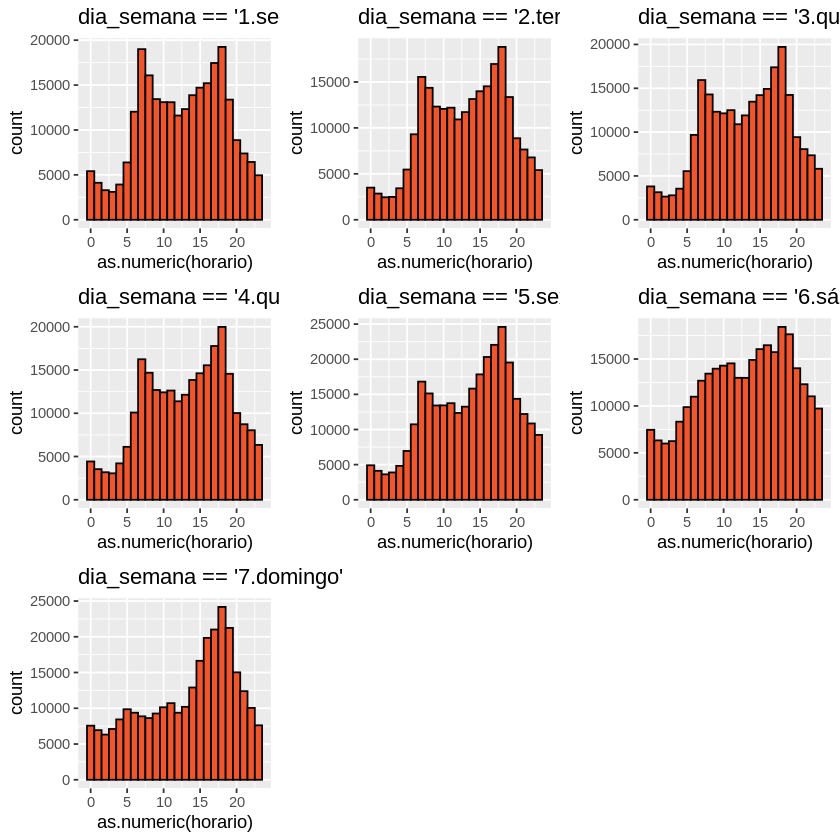

In [ ]:
filters <- list("dia_semana == '1.segunda-feira' ",
                "dia_semana == '2.terça-feira' ",
                "dia_semana == '3.quarta-feira' ",
                "dia_semana == '4.quinta-feira' ",
                "dia_semana == '5.sexta-feira' ",
                "dia_semana == '6.sábado' ",
                "dia_semana == '7.domingo' ")


myfun <- function(fltr, df){
  
  df <- filter(df, eval(parse(text = fltr)))
  ggplot(df, aes(x = as.numeric(horario))) +
    geom_histogram(bins = 24L, fill = "#EF562D", color = "black") +
    ggtitle(fltr) +
    theme_gray()
  
}


ggs <- lapply(filters, myfun, df = acidentes)

gridExtra::grid.arrange(grobs = ggs)

In [ ]:
acidentes %>% group_by(classificacao_acidente) %>% summarise(acidentes = n(), pessoas = sum(pessoas),
veiculos = sum(veiculos)) %>% mutate(Prop = acidentes/sum(acidentes)) %>%
 arrange(desc(acidentes))

classificacao_acidente,acidentes,pessoas,veiculos,Prop
<chr>,<int>,<int>,<int>,<dbl>
Sem Vítimas,982010,1887355,1760351,0.5215
Com Vítimas Feridas,805426,1947506,1332110,0.4278
Com Vítimas Fatais,83831,270240,144439,0.0445
Ignorado,11660,13421,12576,0.0062


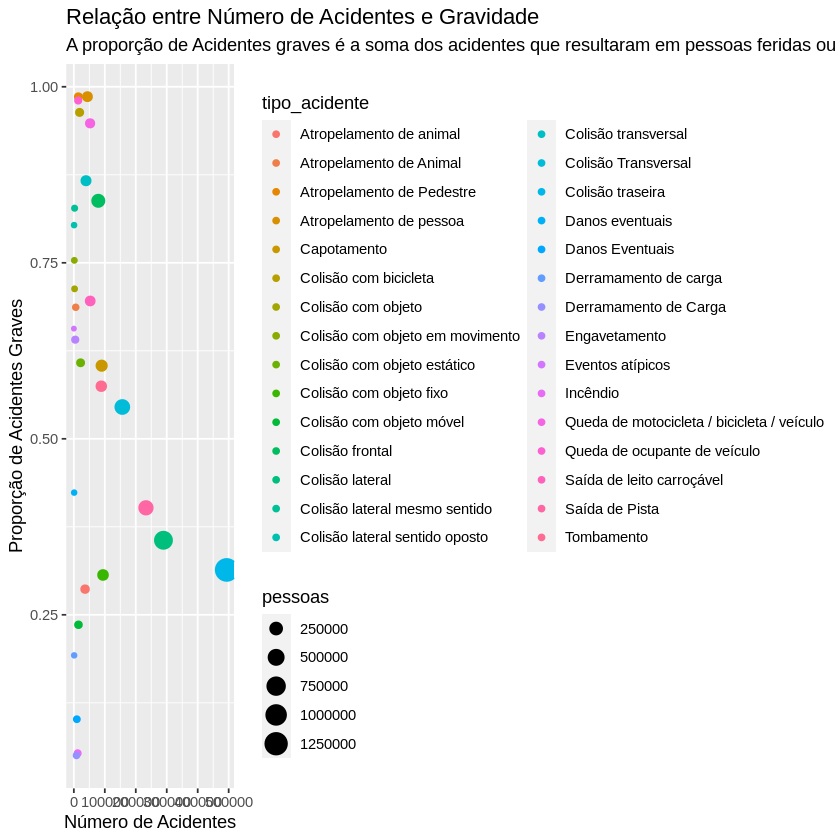

In [ ]:
acidentes %>% group_by(tipo_acidente) %>% summarise(Acidentes = n(), pessoas = sum(pessoas), veiculos = sum(veiculos),ilesos = sum(ilesos) ,feridos = sum(feridos), graves = sum(feridos_graves),
mortos = sum(mortos), ignorados = sum(ignorados), tSemVitimas = sum(classificacao_acidente == "Sem Vítimas"),tFeridas = sum(classificacao_acidente == "Com Vítimas Feridas"),
tFatais = sum(classificacao_acidente == "Com Vítimas Fatais"),tIgnorado = sum(classificacao_acidente == "Ignorado")) %>% mutate(across(10:13, ~ . / Acidentes)) %>% mutate(AcGraves = tFeridas + tFatais) %>% arrange(desc(Acidentes)) %>%
ggplot() + aes(x = Acidentes,y = AcGraves,colour = tipo_acidente,size = pessoas) + geom_point(shape = "circle") +
scale_color_hue(direction = 1) + theme_gray() + labs(title = "Relação entre Número de Acidentes e Gravidade", x = "Número de Acidentes",
y = "Proporção de Acidentes Graves", subtitle = "A proporção de Acidentes graves é a soma dos acidentes que resultaram em pessoas feridas ou mortas em relação ao total de acidentes")

primeiro: analisar as causas de acidentes (variaveis categoricas) (feito)

segundo: reunir essas informacoes e colocar as variaveis quantitativas (classificacao acidente ~ veiculos, pessoas; tipo = boxplot)

terceiro: sumarisar as BRs e criar um score (e fazer mapa com acidentes recentes) <> fazer mapa com causa de acidente por regiao


# Relação entre variáveis categóricas: Teste qui-quadrado e Goodman-Kruskal 

In [ ]:
chisq.test(acidentes$classificacao_acidente, acidentes$tipo_acidente_corrigido)
chisq.test(acidentes$classificacao_acidente, acidentes$causa_acidente_corrigido)
chisq.test(acidentes$classificacao_acidente, acidentes$condicao_metereologica)
chisq.test(acidentes$classificacao_acidente, acidentes$fase_dia)
chisq.test(acidentes$classificacao_acidente, acidentes$sentido_via)
chisq.test(acidentes$classificacao_acidente, acidentes$dia_semana)
chisq.test(acidentes$classificacao_acidente, acidentes$uso_solo)
chisq.test(acidentes$classificacao_acidente, acidentes$tipo_pista)
chisq.test(acidentes$classificacao_acidente, acidentes$tracado_via)
# todos eles parecem estar errados -> problema de alta amostragem e muitos rótulos ???

Warning message in chisq.test(acidentes$classificacao_acidente, acidentes$tipo_acidente_corrigido):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$tipo_acidente_corrigido
X-squared = 480489, df = 51, p-value <0.0000000000000002


Warning message in chisq.test(acidentes$classificacao_acidente, acidentes$causa_acidente_corrigido):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$causa_acidente_corrigido
X-squared = 55359, df = 87, p-value <0.0000000000000002


Warning message in chisq.test(acidentes$classificacao_acidente, acidentes$condicao_metereologica):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$condicao_metereologica
X-squared = 93486, df = 39, p-value <0.0000000000000002


Warning message in chisq.test(acidentes$classificacao_acidente, acidentes$fase_dia):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$fase_dia
X-squared = 55911, df = 15, p-value <0.0000000000000002


Warning message in chisq.test(acidentes$classificacao_acidente, acidentes$sentido_via):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$sentido_via
X-squared = 342, df = 6, p-value <0.0000000000000002



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$dia_semana
X-squared = 14221, df = 18, p-value <0.0000000000000002


Warning message in chisq.test(acidentes$classificacao_acidente, acidentes$uso_solo):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$uso_solo
X-squared = 148641, df = 12, p-value <0.0000000000000002


Warning message in chisq.test(acidentes$classificacao_acidente, acidentes$tipo_pista):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$tipo_pista
X-squared = 21550, df = 9, p-value <0.0000000000000002


Warning message in chisq.test(acidentes$classificacao_acidente, acidentes$tracado_via):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  acidentes$classificacao_acidente and acidentes$tracado_via
X-squared = 32516, df = 33, p-value <0.0000000000000002


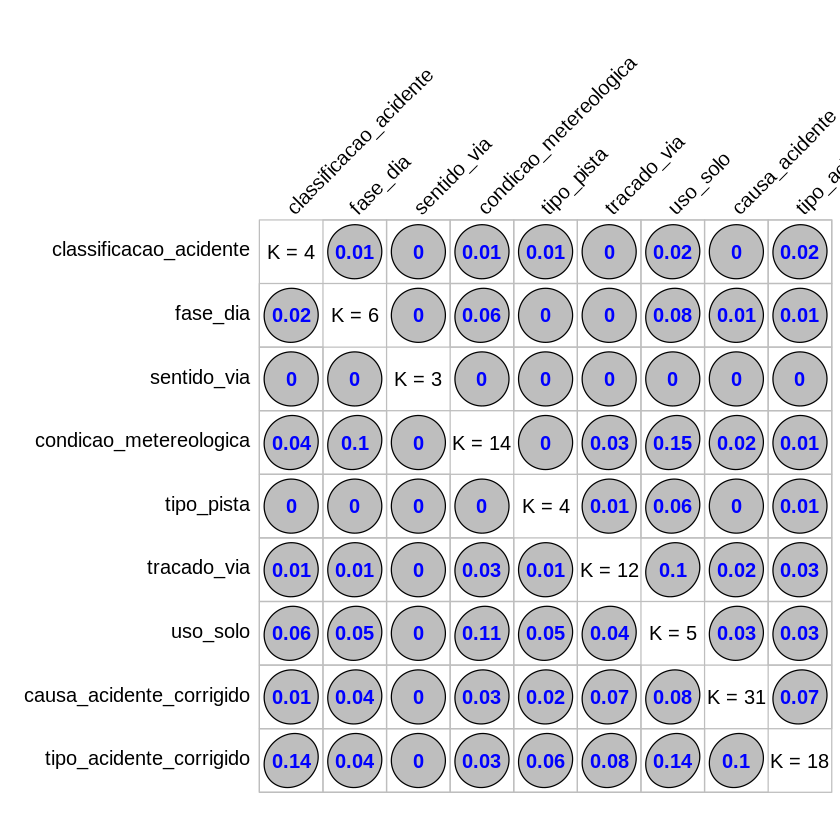

In [ ]:
acidentes %>% select(c(11:17,34:35)) %>% GKtauDataframe() %>% plot(corrColors = "blue")

Relação entre variáveis categóricas: Totais e Proporções

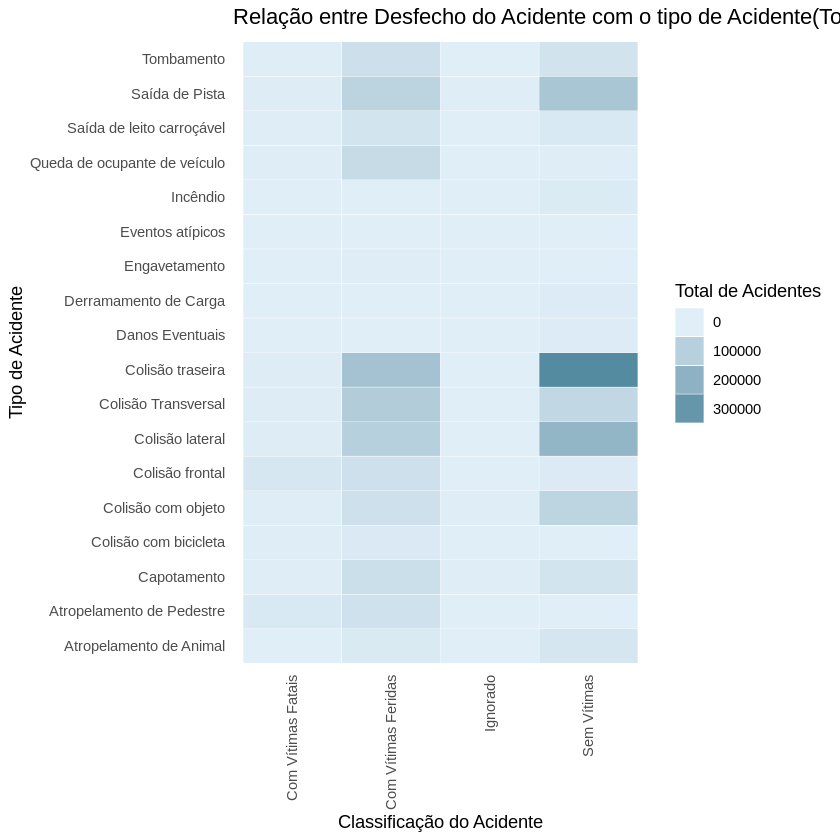

In [ ]:
#1.1 - Total de classificação do acidente por tipo do acidente
table(acidentes$tipo_acidente_corrigido,acidentes$classificacao_acidente) %>% as.data.frame() %>%
ggplot(aes(Var2, Var1)) + geom_tile(aes(fill = Freq),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "#E0EEF7", high = "#548BA1") +  
  guides(fill=guide_legend(title="Total de Acidentes")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Relação entre Desfecho do Acidente com o tipo de Acidente(Total)",
       x = "Classificação do Acidente", y = "Tipo de Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

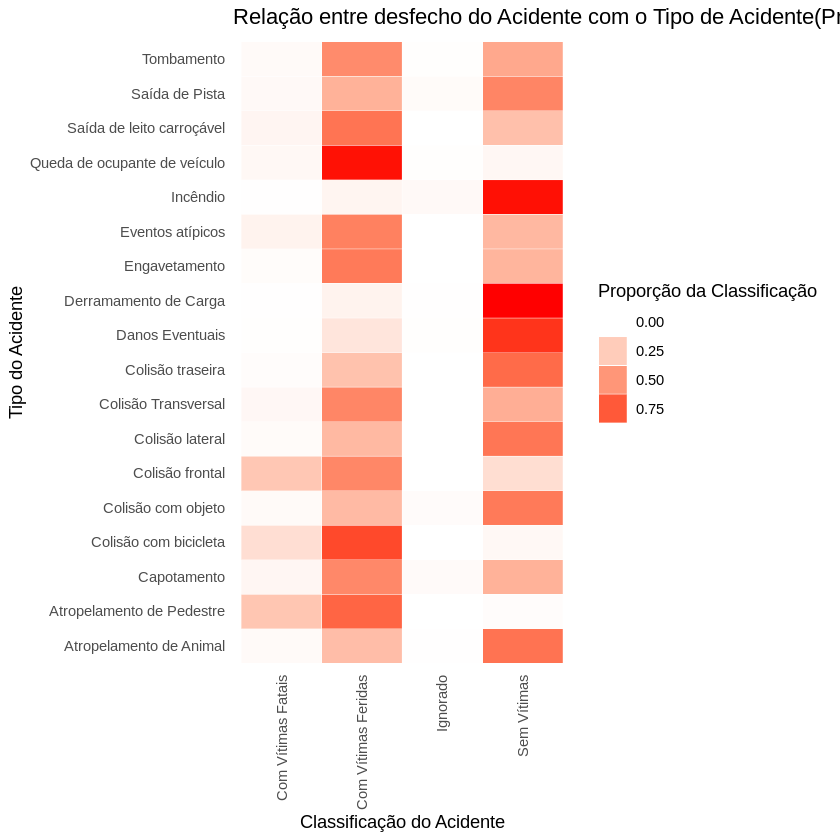

In [ ]:
#1.2 - Proporcao da classificacao do acidente por tipo de acidente
table(acidentes$tipo_acidente_corrigido,acidentes$classificacao_acidente) %>% as.data.frame() %>% pivot_wider(names_from = Var2, values_from = Freq)  %>%
mutate(Total = rowSums(across(where(is.numeric)))) %>% ungroup()  %>% mutate(across(2:6, ~ . / Total)) %>% select(-Total) %>% pivot_longer(2:5, names_to = "Hora", values_to = "PropAcidentes") %>%
ggplot(aes(Hora, Var1)) + geom_tile(aes(fill = PropAcidentes),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "white",high = "red") +  
  guides(fill=guide_legend(title="Proporção da Classificação")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Relação entre desfecho do Acidente com o Tipo de Acidente(Proporção)",
       x = "Classificação do Acidente", y = "Tipo do Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

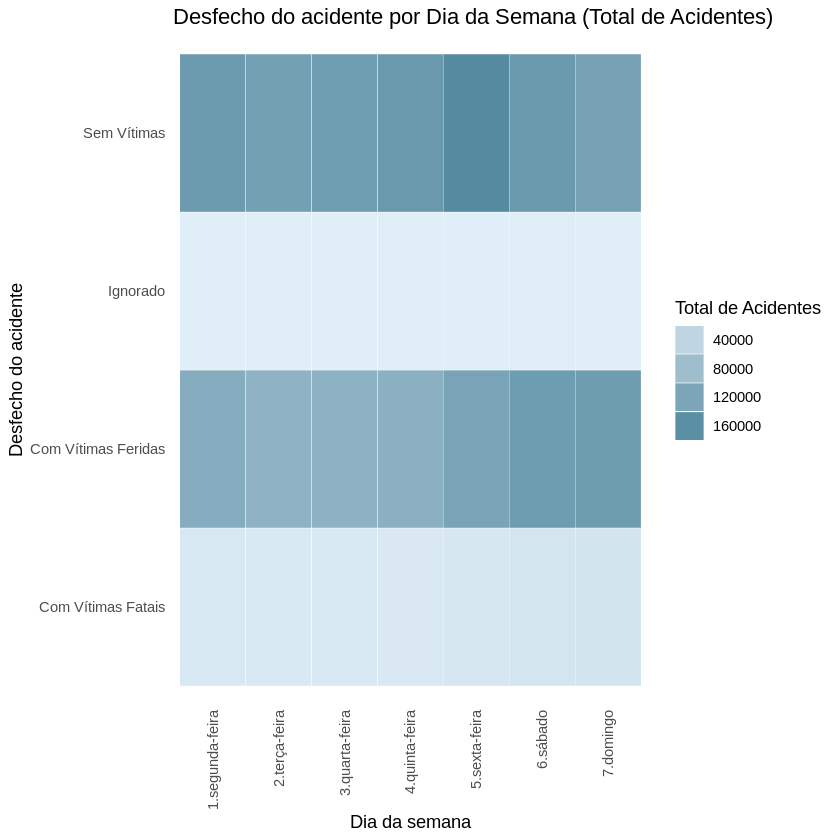

In [ ]:
#2.1 - Classificacao o acidente por dia da semana (total)
table(acidentes$classificacao_acidente,acidentes$dia_semana) %>% as.data.frame() %>%
ggplot(aes(Var2, Var1)) + geom_tile(aes(fill = Freq),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "#E0EEF7", high = "#548BA1") +  
  guides(fill=guide_legend(title="Total de Acidentes")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Desfecho do acidente por Dia da Semana (Total de Acidentes)",
       x = "Dia da semana", y = "Desfecho do acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

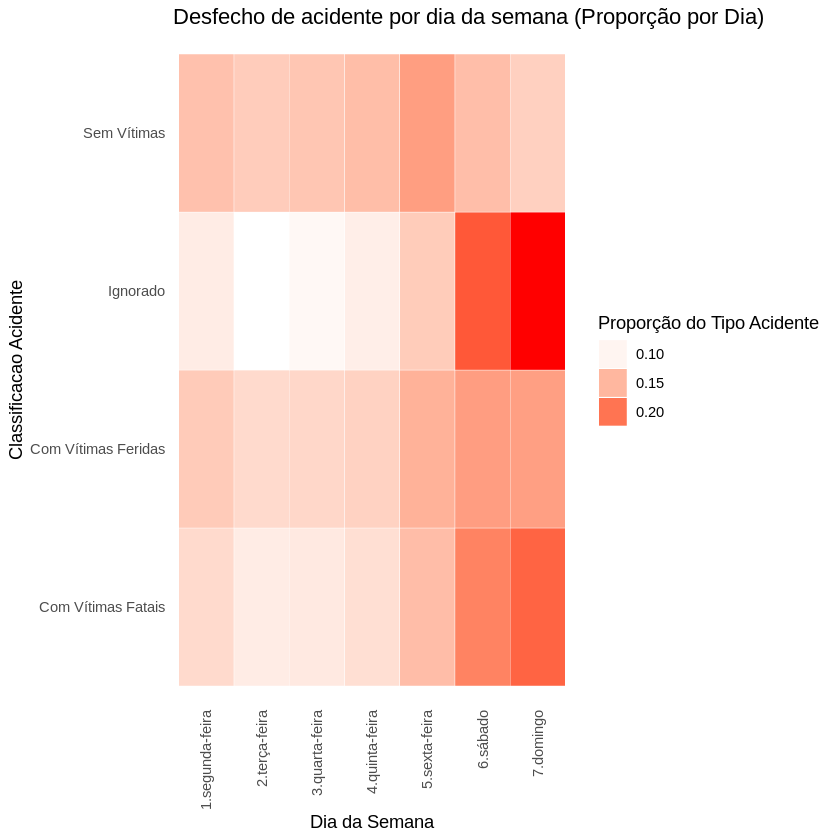

In [ ]:
#2.2 - Proporção da classificação do acidente por dia da semana
table(acidentes$classificacao_acidente,acidentes$dia_semana) %>% as.data.frame() %>%
pivot_wider(names_from = Var2, values_from = Freq)  %>%
mutate(Total = rowSums(across(where(is.numeric)))) %>% ungroup() %>% mutate(across(2:9, ~ . / Total)) %>% select(-Total) %>% pivot_longer(2:8, names_to = "Hora", values_to = "PropAcidentes") %>%
ggplot(aes(Hora, Var1)) + geom_tile(aes(fill = PropAcidentes),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "white",high = "red") +  
  guides(fill=guide_legend(title="Proporção do Tipo Acidente")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Desfecho de acidente por dia da semana (Proporção por Dia)",
       x = "Dia da Semana", y = "Classificacao Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

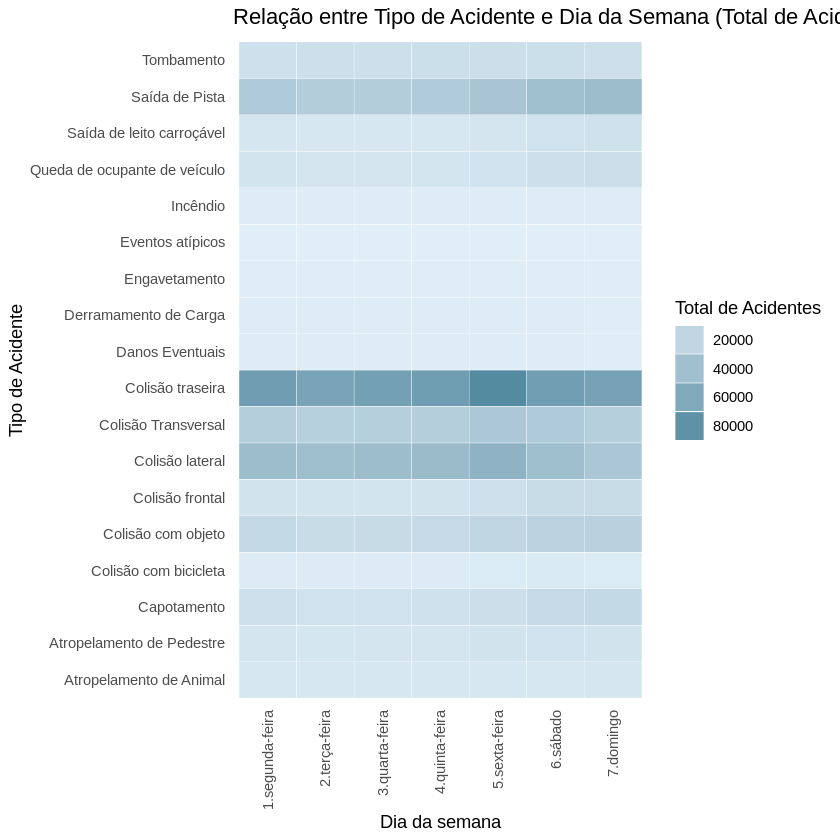

In [ ]:
#3.1 - Relacao entre tipo de acidente e dia da semana (total) 
table(acidentes$tipo_acidente_corrigido,acidentes$dia_semana) %>% as.data.frame() %>%
ggplot(aes(Var2, Var1)) + geom_tile(aes(fill = Freq),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "#E0EEF7", high = "#548BA1") +  
  guides(fill=guide_legend(title="Total de Acidentes")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Relação entre Tipo de Acidente e Dia da Semana (Total de Acidentes)",
       x = "Dia da semana", y = "Tipo de Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

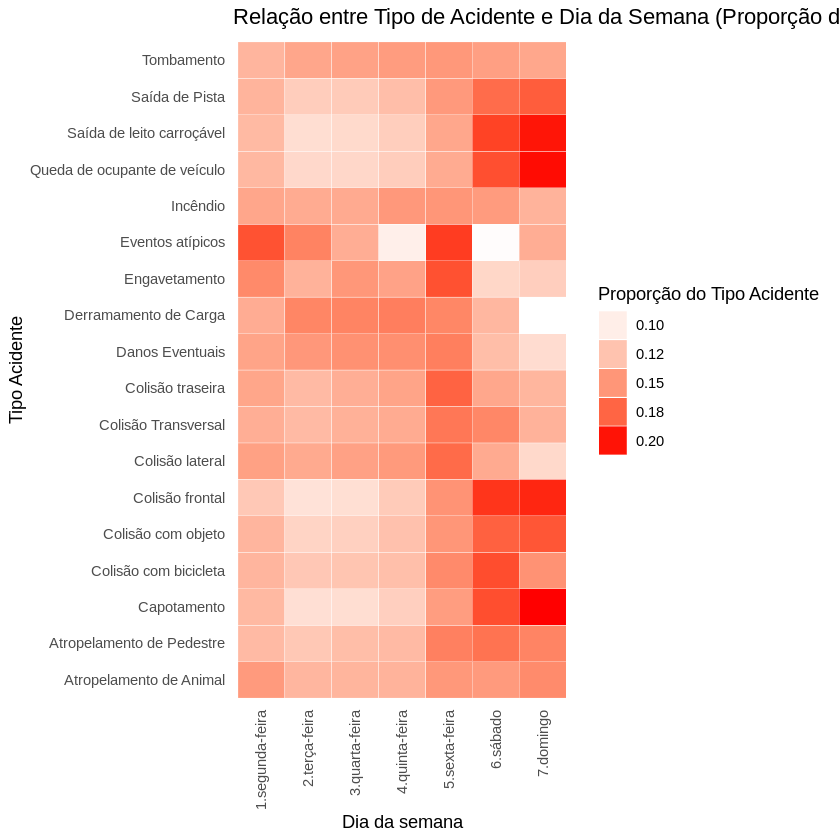

In [ ]:
#3.2 - Relação entre tipo do acidente e dia da semana(proporção)
table(acidentes$tipo_acidente_corrigido,acidentes$dia_semana) %>% as.data.frame() %>%
pivot_wider(names_from = Var2, values_from = Freq)  %>%
mutate(Total = rowSums(across(where(is.numeric)))) %>% ungroup() %>% mutate(across(2:9, ~ . / Total)) %>% select(-Total) %>% pivot_longer(2:8, names_to = "Hora", values_to = "PropAcidentes") %>%
ggplot(aes(Hora, Var1)) + geom_tile(aes(fill = PropAcidentes),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "white",high = "red") +  
  guides(fill=guide_legend(title="Proporção do Tipo Acidente")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Relação entre Tipo de Acidente e Dia da Semana (Proporção de Acidentes por Dia)",
       x = "Dia da semana", y = "Tipo Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

horario ~ tipo_acidente e classificacao_acidente no mesmo grafico (gridArrow)


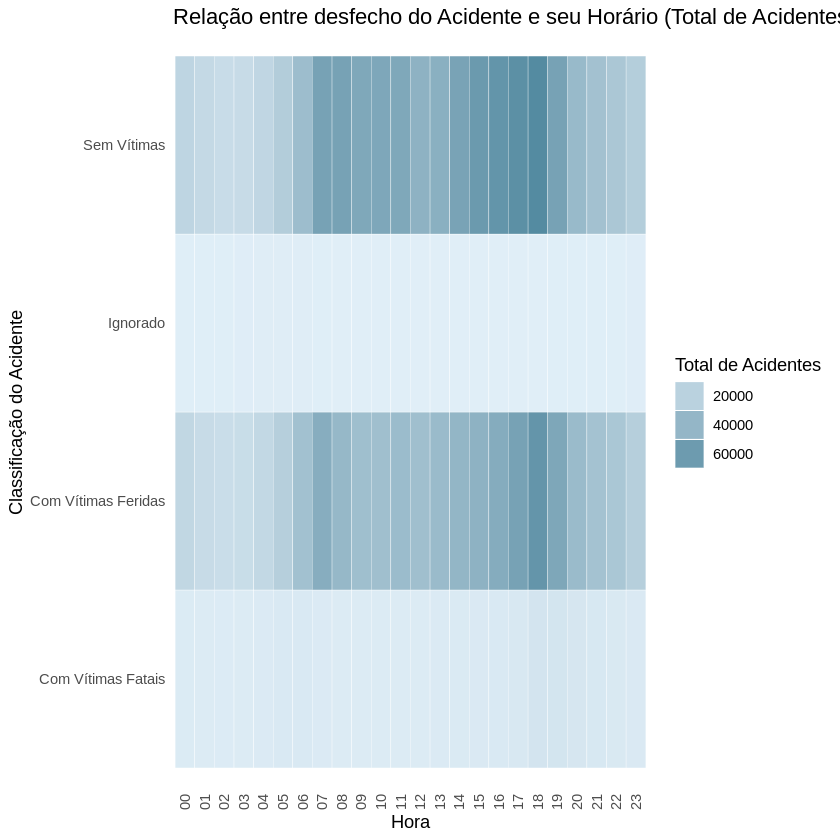

In [ ]:
#4.1 - relacao entre desfecho do acidente e horario(total)
table(acidentes$classificacao_acidente,acidentes$horario) %>% as.data.frame() %>%
ggplot(aes(Var2, Var1)) + geom_tile(aes(fill = Freq),colour = "white", na.rm = TRUE) +
scale_fill_gradient(low = "#E0EEF7", high = "#548BA1") +  
  guides(fill=guide_legend(title="Total de Acidentes")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Relação entre desfecho do Acidente e seu Horário (Total de Acidentes)",
       x = "Hora", y = "Classificação do Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

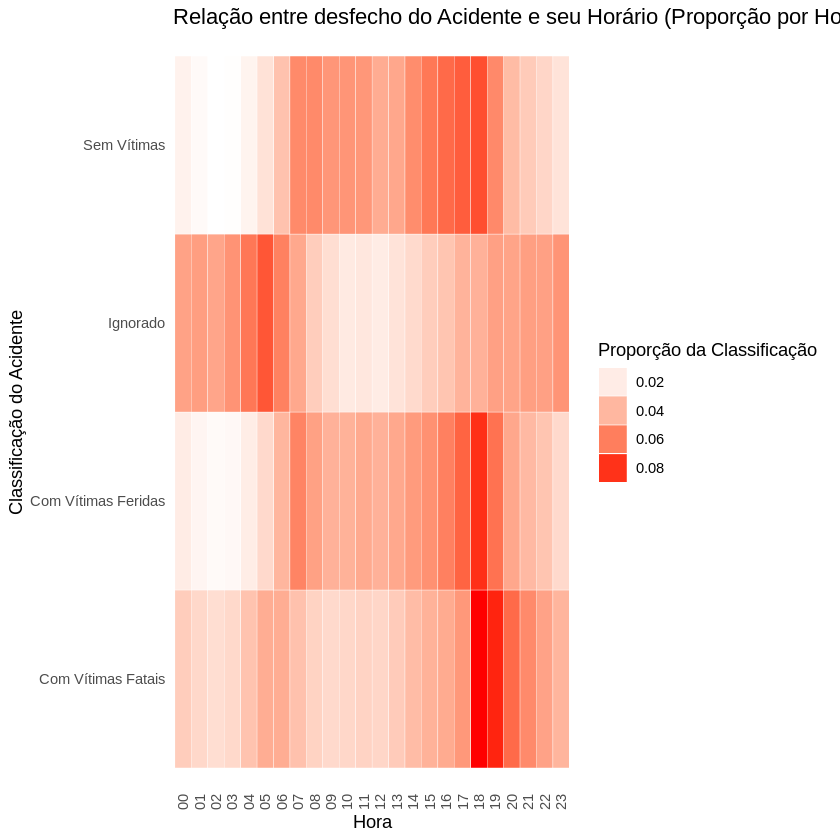

In [ ]:
#4.2 - relacao entre desfecho do acidente e horario (proporcao)
table(acidentes$classificacao_acidente,acidentes$horario) %>% as.data.frame() %>% pivot_wider(names_from = Var2, values_from = Freq) %>%
mutate(Total = rowSums(across(where(is.numeric)))) %>% ungroup() %>% mutate(across(2:26, ~ . / Total)) %>% select(-Total) %>% pivot_longer(2:24, names_to = "Hora", values_to = "PropAcidentes") %>%
ggplot(aes(Hora, Var1)) + geom_tile(aes(fill = PropAcidentes),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "white",high = "red") +  
  guides(fill=guide_legend(title="Proporção da Classificação")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Relação entre desfecho do Acidente e seu Horário (Proporção por Horário)",
       x = "Hora", y = "Classificação do Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

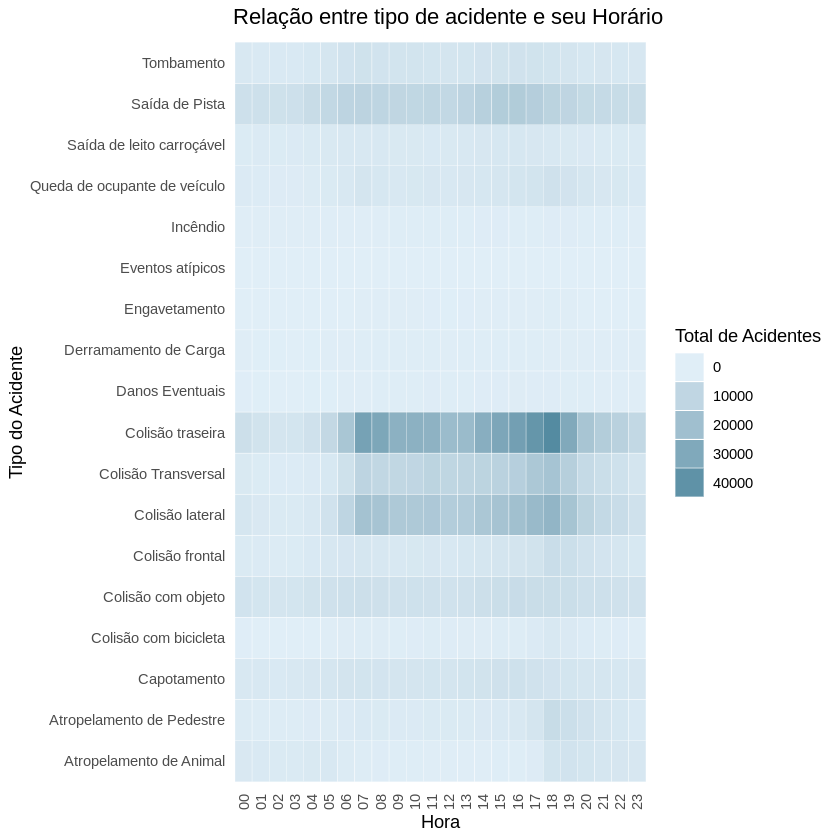

In [ ]:
#5.1 - Relação entre tipo de acidente e horario
table(acidentes$tipo_acidente_corrigido,acidentes$horario) %>% as.data.frame() %>%
ggplot(aes(Var2, Var1)) + geom_tile(aes(fill = Freq),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "#E0EEF7", high = "#548BA1") +  
  guides(fill=guide_legend(title="Total de Acidentes")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Relação entre tipo de acidente e seu Horário",
       x = "Hora", y = "Tipo do Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

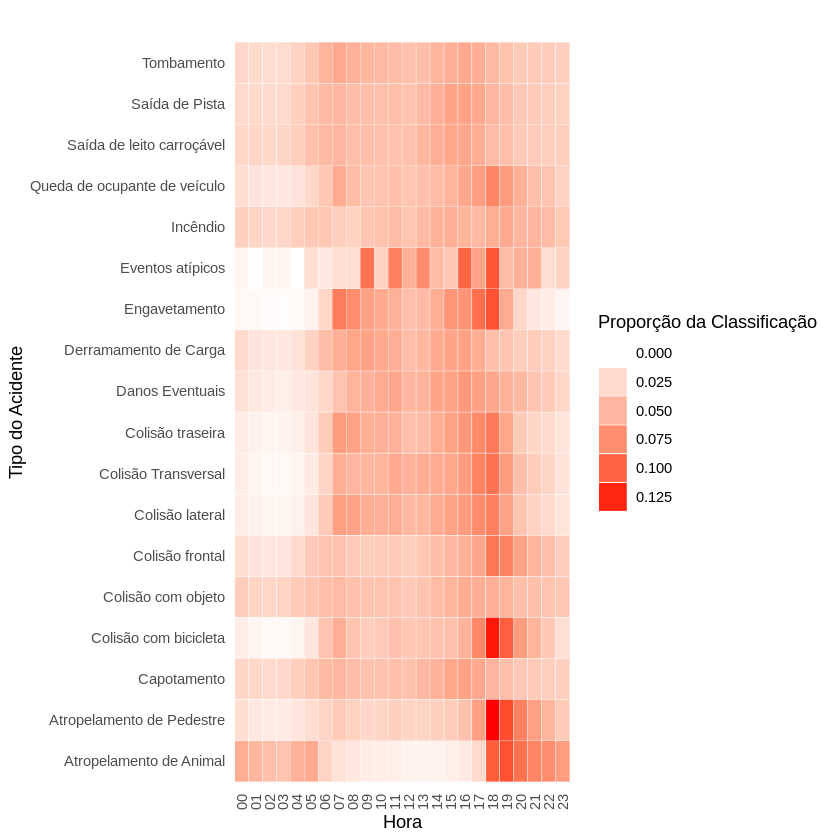

In [ ]:
#5.2 - Relação entre tipo de acidente e horario
table(acidentes$tipo_acidente_corrigido,acidentes$horario) %>% as.data.frame() %>% pivot_wider(names_from = Var2, values_from = Freq) %>%
mutate(Total = rowSums(across(where(is.numeric)))) %>% ungroup() %>% mutate(across(2:26, ~ . / Total)) %>% select(-Total) %>% pivot_longer(2:25, names_to = "Hora", values_to = "PropAcidentes") %>%
ggplot(aes(Hora, Var1)) + geom_tile(aes(fill = PropAcidentes),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "white",high = "red") +  
  guides(fill=guide_legend(title="Proporção da Classificação")) +
  theme_bw() + theme_minimal() + 
  labs(title = "",
       x = "Hora", y = "Tipo do Acidente") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

 Multiple Correspondence Analysis
 


In [ ]:
mca <- MCA(acidentes[,c(11:17)])

Warning message:
“ggrepel: 45 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [ ]:
summary(mca)


Call:
MCA(X = acidentes[, c(11:17)]) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.429   0.370   0.227   0.191   0.176   0.170   0.163
% of var.              7.317   6.319   3.871   3.267   2.999   2.904   2.777
Cumulative % of var.   7.317  13.636  17.507  20.774  23.773  26.677  29.454
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.154   0.151   0.146   0.144   0.144   0.144   0.143
% of var.              2.637   2.584   2.493   2.467   2.462   2.455   2.448
Cumulative % of var.  32.091  34.674  37.167  39.633  42.095  44.550  46.999
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.143   0.143   0.143   0.143   0.143   0.143   0.143
% of var.              2.443   2.442   2.440   2.439   2.439   2.437   2.436
Cumulative % of var.  49.441  51.884  54.324  56.763  59.202  61.639  64.075
                      D

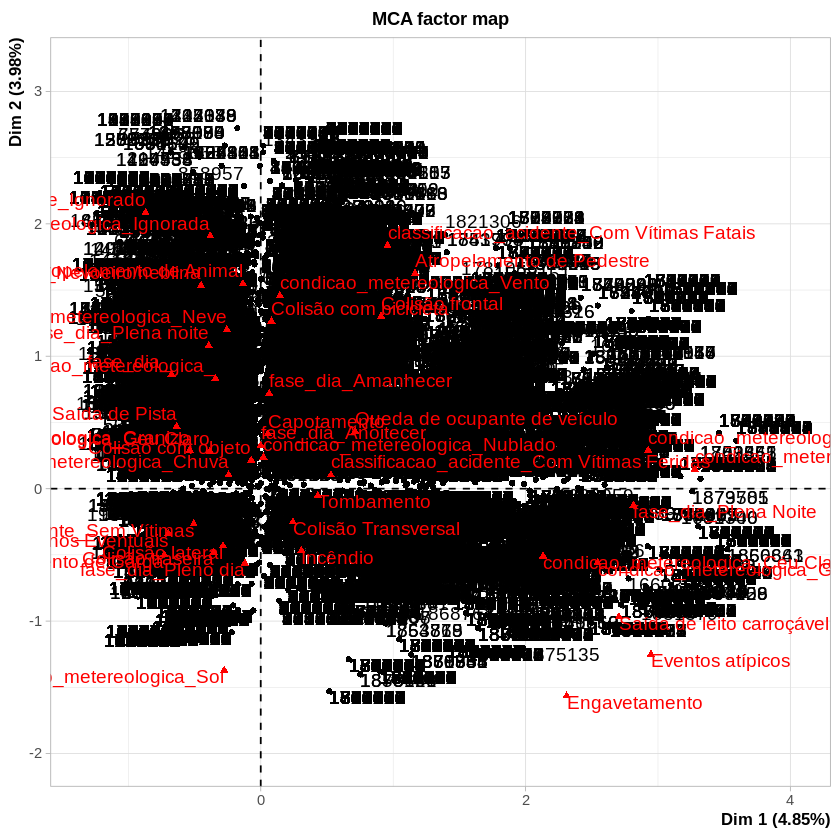

In [ ]:
plot.MCA(mca)

BRs e seus desfechos

In [ ]:
BRS <- acidentes %>% group_by(br) %>% summarise(Estados = n_distinct(uf),Municipios = n_distinct(municipio),Acidentes = n(), Pessoas = sum(pessoas), Veiculos = sum(veiculos),
Ilesos = sum(ilesos), Feridos = sum(feridos), Graves = sum(feridos_graves), Mortos = sum(mortos), ignorados = sum(ignorados),
tSemVitimas = sum(classificacao_acidente == "Sem Vítimas"),tFeridas = sum(classificacao_acidente == "Com Vítimas Feridas"),
tFatais = sum(classificacao_acidente == "Com Vítimas Fatais"),tIgnorado = sum(classificacao_acidente == "Ignorado")) %>% mutate(PropFeridosGrave = Graves/Feridos) %>%
select(-Graves) %>% arrange(desc(Acidentes))

In [ ]:
head(BRS)

br,Estados,Municipios,Acidentes,Pessoas,Veiculos,Ilesos,Feridos,Mortos,ignorados,tSemVitimas,tFeridas,tFatais,tIgnorado,PropFeridosGrave
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
101,11,352,322832,701597,584283,451322,204880,14153,31223,176174,132866,11837,1955,0.25
116,10,301,318376,670934,557386,447882,177609,13935,31491,190401,114472,11840,1663,0.22
381,2,93,113886,230801,185326,147880,72034,4115,6767,66085,43945,3417,439,0.22
40,4,69,94702,201256,155986,126233,63597,3851,7570,51897,39060,3175,570,0.23
153,8,174,71689,159325,118439,95250,53655,4765,5651,35775,31713,3789,412,0.28
364,5,82,56937,128923,97019,78134,43187,3288,4311,26785,27211,2675,266,0.26


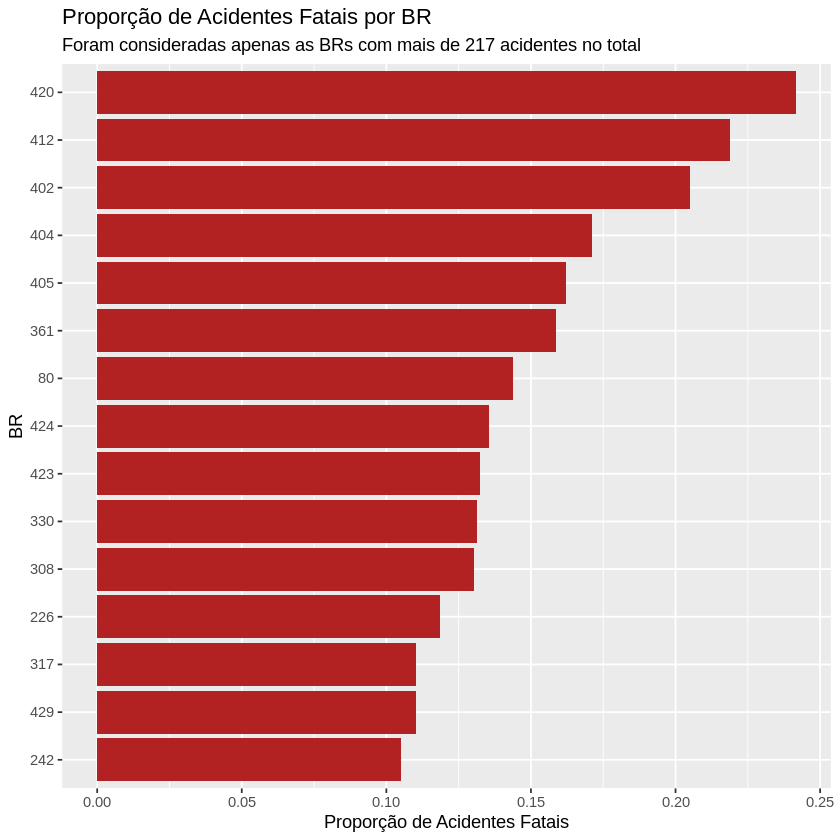

In [ ]:
#BRs por acidentes fatais
BRS %>% select(1,4,11:14) %>% mutate(Total = rowSums(across(tSemVitimas:tIgnorado))) %>% ungroup() %>% mutate(across(3:7, ~ . / Total)) %>% select(-Total) %>%
filter(Acidentes > 217) %>% top_n(15, tFatais) %>% arrange(desc(tFatais)) %>% ungroup() %>% mutate(br2 = fct_reorder(br, tFatais)) %>%
ggplot(aes(x = br2, y = tFatais)) + geom_col(fill = "#B22222") + coord_flip() + labs(x = "BR", y = "Proporção de Acidentes Fatais", title = "Proporção de Acidentes Fatais por BR",
subtitle = "Foram consideradas apenas as BRs com mais de 217 acidentes no total")

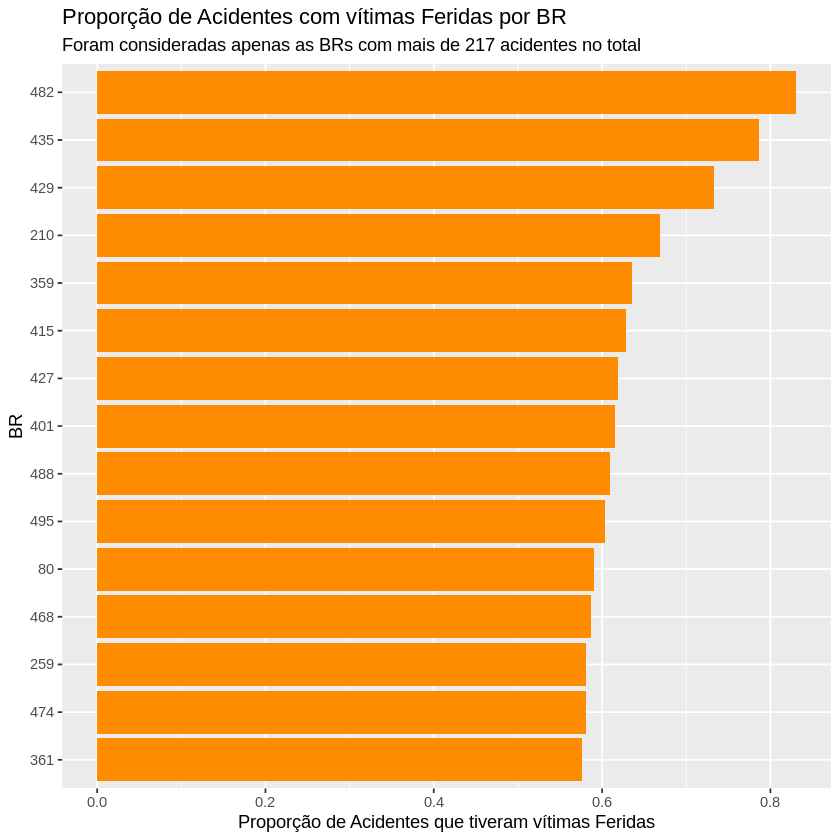

In [ ]:
#BRs por vitimas feridas
BRS %>% select(1,4,11:14) %>% mutate(Total = rowSums(across(tSemVitimas:tIgnorado))) %>% ungroup() %>% mutate(across(3:7, ~ . / Total)) %>% select(-Total) %>%
filter(Acidentes > 217) %>% top_n(15, tFeridas) %>% arrange(desc(tFeridas)) %>% ungroup() %>% mutate(br2 = fct_reorder(br, tFeridas)) %>%
ggplot(aes(x = br2, y = tFeridas)) + geom_col(fill = "#FF8C00") + coord_flip() + labs(x = "BR", y = "Proporção de Acidentes que tiveram vítimas Feridas", title = "Proporção de Acidentes com vítimas Feridas por BR",
subtitle = "Foram consideradas apenas as BRs com mais de 217 acidentes no total")

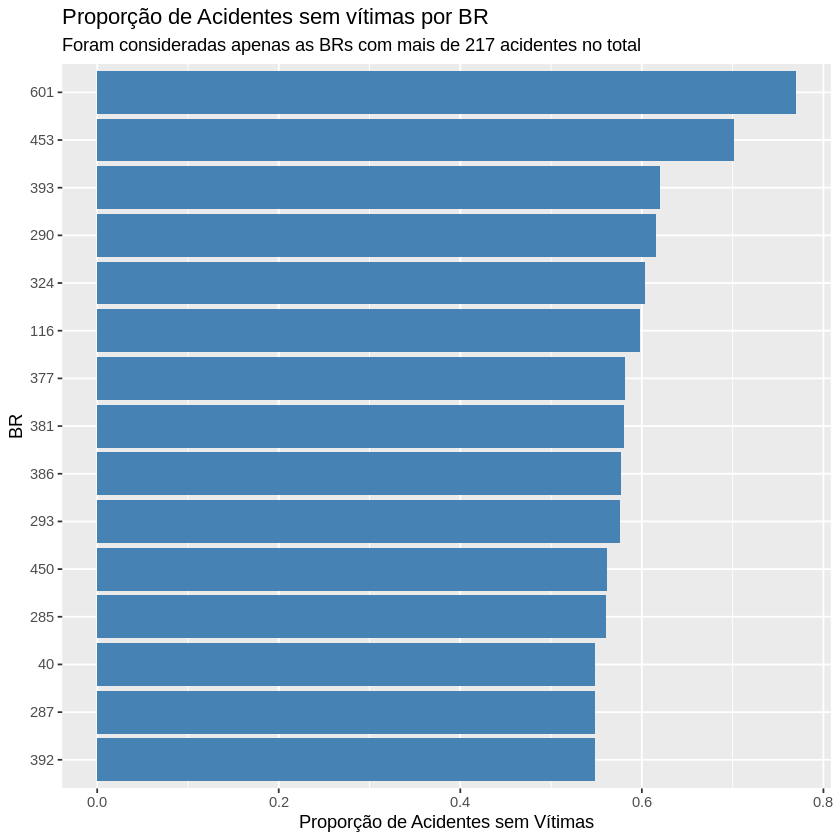

In [ ]:
#BRs por vitimas feridas
BRS %>% select(1,4,11:14) %>% mutate(Total = rowSums(across(tSemVitimas:tIgnorado))) %>% ungroup() %>% mutate(across(3:7, ~ . / Total)) %>% select(-Total) %>%
filter(Acidentes > 217) %>% top_n(15, tSemVitimas) %>% arrange(desc(tSemVitimas)) %>% ungroup() %>% mutate(br2 = fct_reorder(br, tSemVitimas)) %>%
ggplot(aes(x = br2, y = tSemVitimas)) + geom_col(fill = "#4682B4") + coord_flip() + labs(x = "BR", y = "Proporção de Acidentes sem Vítimas", title = "Proporção de Acidentes sem vítimas por BR",
subtitle = "Foram consideradas apenas as BRs com mais de 217 acidentes no total")

In [ ]:
BRS_clean <- BRS %>% mutate(across(11:14, ~ . / Acidentes)) %>% ungroup() %>% select(1,2,3,4,11:15) %>% drop_na(br) %>% filter(Acidentes > 212)

In [ ]:
dist_BRS <- BRS_clean %>% select(-1) %>% scale() %>% dist(method = "euclidean")

In [ ]:
clustering_hierarquical <- function(distancia, method){
  hc_brs <- hclust(distancia, method = method)
  coph_brs <- cophenetic(hc_brs)
  cor(dist_BRS,coph_brs)
}

metodos <- list("ward.D","ward.D2","single","complete","average","mcquitty","median",
                "centroid")

lapply(metodos, clustering_hierarquical, distancia = dist_BRS)

[[1]]
[1] 0.47

[[2]]
[1] 0.53

[[3]]
[1] 0.84

[[4]]
[1] 0.7

[[5]]
[1] 0.88

[[6]]
[1] 0.8

[[7]]
[1] 0.85

[[8]]
[1] 0.86

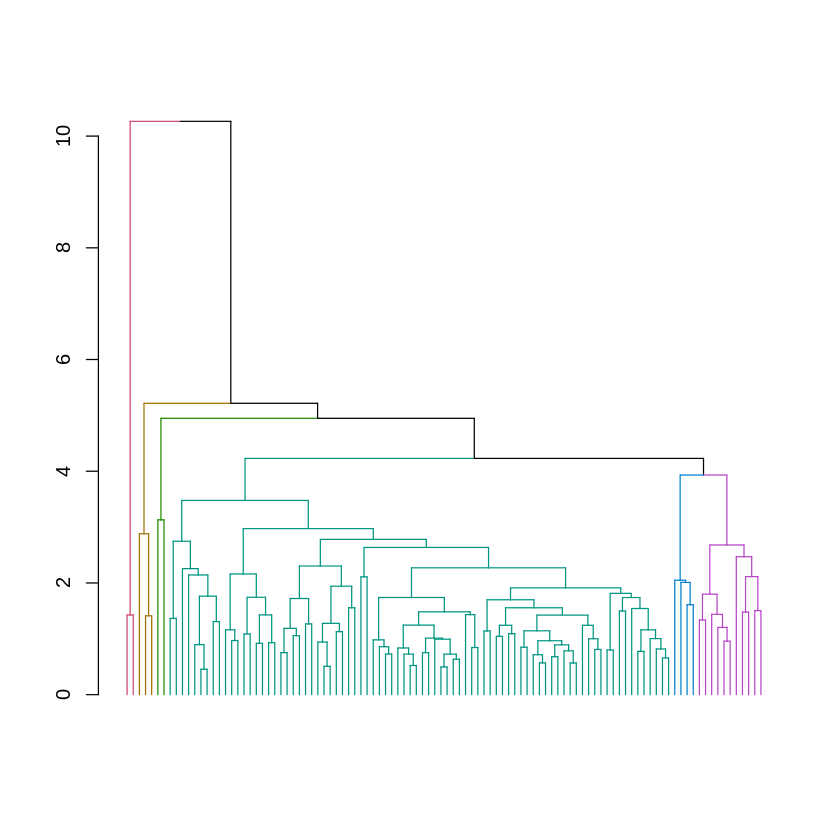

In [ ]:
hc_BRS <- hclust(dist_BRS, method = "average")
hc_BRS %>% as.dendrogram() %>% color_branches(k = 6) %>% plot(leaflab = "none")

In [ ]:
cluster_assignments <- cutree(hc_BRS, k = 6)#fazendo o corte

BRS <- BRS_clean %>% mutate(cluster_hc = cluster_assignments)

In [ ]:
BRS %>% group_by(cluster_hc) %>%
summarise(N = n(), Estados = round(mean(Estados),0), Municipios = round(mean(Municipios)), Acidentes = mean(Acidentes),
tSemVitimas = mean(tSemVitimas), tFeridas = mean(tFeridas), tFatais = mean(tFatais),tIgnorado = mean(tIgnorado),
PropFeridosGrave = mean(PropFeridosGrave))

cluster_hc,N,Estados,Municipios,Acidentes,tSemVitimas,tFeridas,tFatais,tIgnorado,PropFeridosGrave
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,10,326,320604,0.57,0.39,0.037,0.0056,0.24
2,82,2,32,14919,0.45,0.49,0.055,0.0068,0.27
3,11,1,12,1139,0.31,0.55,0.119,0.0180,0.34
4,4,2,14,596,0.26,0.53,0.206,0.0040,0.39
5,2,1,2,354,0.74,0.25,0.013,0.0013,0.28
6,3,1,5,272,0.14,0.78,0.080,0.0000,0.33


# Estados

In [ ]:
UFS <- acidentes %>% group_by(uf) %>% summarise(Municipios = n_distinct(municipio),Acidentes = n(), Pessoas = sum(pessoas), Veiculos = sum(veiculos),
Ilesos = sum(ilesos), Feridos = sum(feridos), Graves = sum(feridos_graves), Mortos = sum(mortos), ignorados = sum(ignorados),
tSemVitimas = sum(classificacao_acidente == "Sem Vítimas"),tFeridas = sum(classificacao_acidente == "Com Vítimas Feridas"),
tFatais = sum(classificacao_acidente == "Com Vítimas Fatais"),tIgnorado = sum(classificacao_acidente == "Ignorado")) %>% mutate(PropFeridosGrave = Graves/Feridos) %>%
select(-Graves) %>% arrange(desc(Acidentes))

In [ ]:
regioes <- read_excel("/content/regioes.xlsx", col_types = c("text", "text"), sheet = 1)

In [ ]:
UFS <- left_join(UFS, regioes, by = "uf")

In [ ]:
head(UFS)

uf,Municipios,Acidentes,Pessoas,Veiculos,Ilesos,Feridos,Mortos,ignorados,tSemVitimas,tFeridas,tFatais,tIgnorado,PropFeridosGrave,Regiao
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
MG,291,271094,566701,432982,327594,207582,14697,16818,137410,120901,11605,1178,0.25,Sudeste
SC,151,205553,439369,371687,271794,146083,7107,14377,102156,96449,5951,997,0.22,Sul
PR,181,194040,422725,333538,260287,135868,8671,17896,96493,88797,7267,1483,0.24,Sul
RJ,62,161224,345534,286785,238852,85682,6363,14630,102351,52731,5461,681,0.21,Sudeste
RS,230,146431,317987,251461,217730,85747,5685,8819,87582,53191,4749,909,0.22,Sul
SP,83,139038,285641,242207,192154,73295,4550,15636,84082,50193,4124,639,0.18,Sudeste


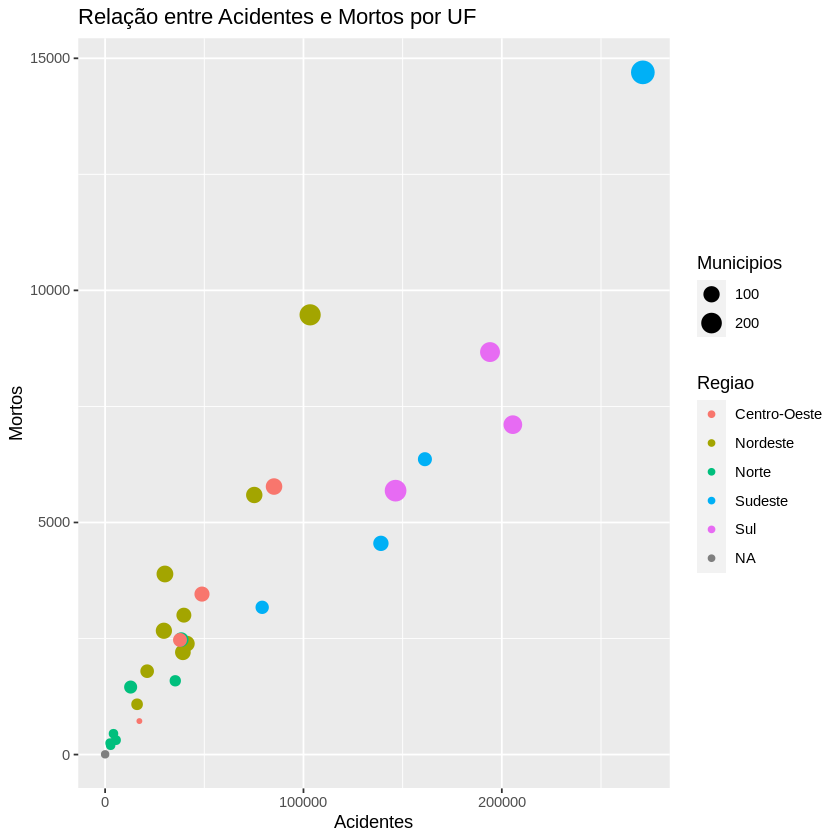

In [ ]:
ggplot(UFS) + aes(x = Acidentes, y = Mortos, size = Municipios, color = Regiao) + geom_point(shape = "circle") + theme_gray() +
labs(title = "Relação entre Acidentes e Mortos por UF", x =  "Acidentes" , y = "Mortos")

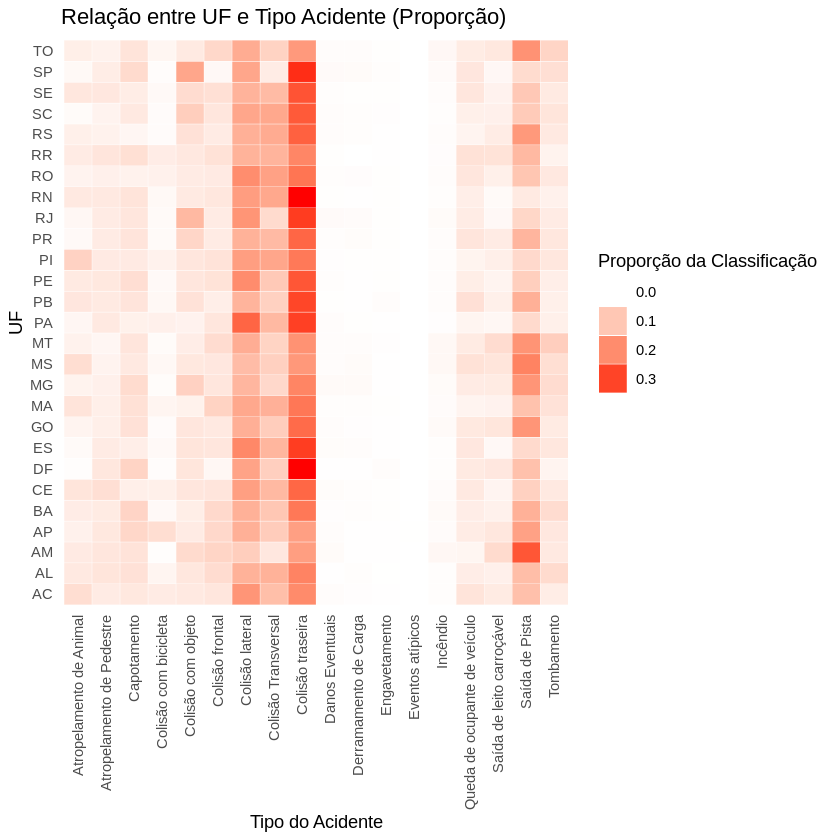

In [ ]:
table(acidentes$uf,acidentes$tipo_acidente_corrigido) %>% as.data.frame() %>% pivot_wider(names_from = Var2, values_from = Freq) %>%
mutate(Total = rowSums(across(where(is.numeric)))) %>% ungroup() %>% slice(-1) %>% mutate(across(2:20, ~ . / Total)) %>% select(-Total) %>% pivot_longer(2:19, names_to = "UF", values_to = "PropAcidentes") %>%
ggplot(aes(UF, Var1)) + geom_tile(aes(fill = PropAcidentes),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = "white",high = "red") +  
  guides(fill=guide_legend(title="Proporção da Classificação")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Relação entre UF e Tipo Acidente (Proporção)",
       x = "Tipo do Acidente", y = "UF") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  axis.text.x = element_text(angle = 90, vjust = 0.5, hjust =1))

In [ ]:
# ler o shape file
br_mapa <- st_read('/content/BR_UF_2019.shp')

Reading layer `BR_UF_2019' from data source `/content/BR_UF_2019.shp' using driver `ESRI Shapefile'
Simple feature collection with 27 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74 ymin: -34 xmax: -29 ymax: 5.3
Geodetic CRS:  SIRGAS 2000


In [ ]:
#montar a base para os dados
base_ufs <- UFS %>% select(1,3,10:13) %>% mutate(across(2:6, ~ . / Acidentes))

In [ ]:
#fazer join com o shapefile
base_mapa <- left_join(br_mapa, base_ufs, by = c("SIGLA_UF" = "uf"))

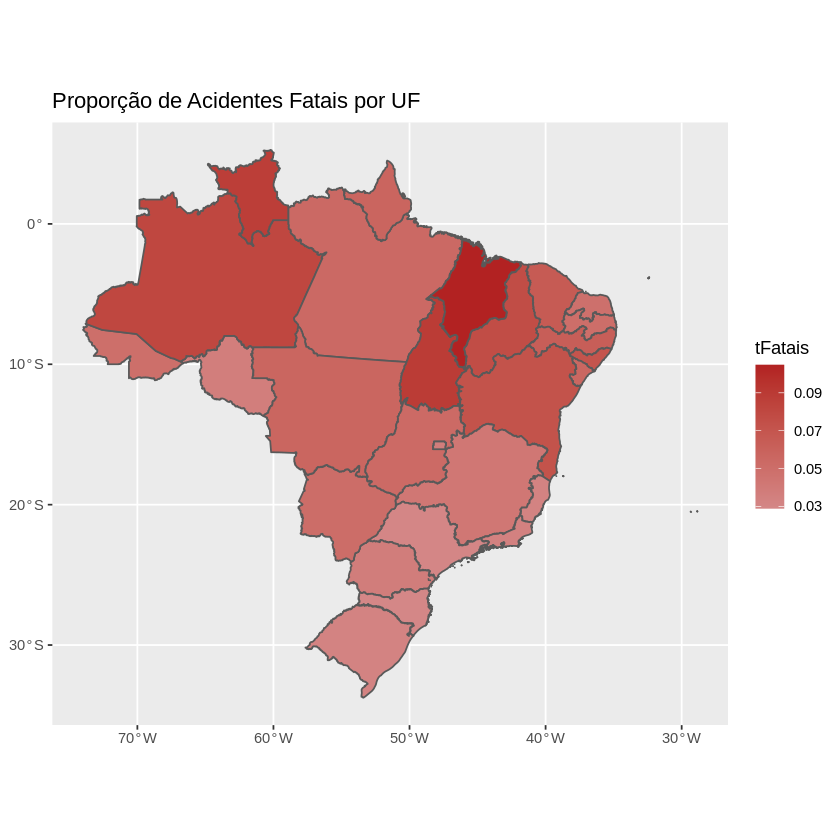

In [ ]:
ggplot() + geom_sf(data = base_mapa , aes(fill = tFatais)) + scale_fill_gradient(low ="#D48787", high = "#B22222" ) + labs(title = "Proporção de Acidentes Fatais por UF")

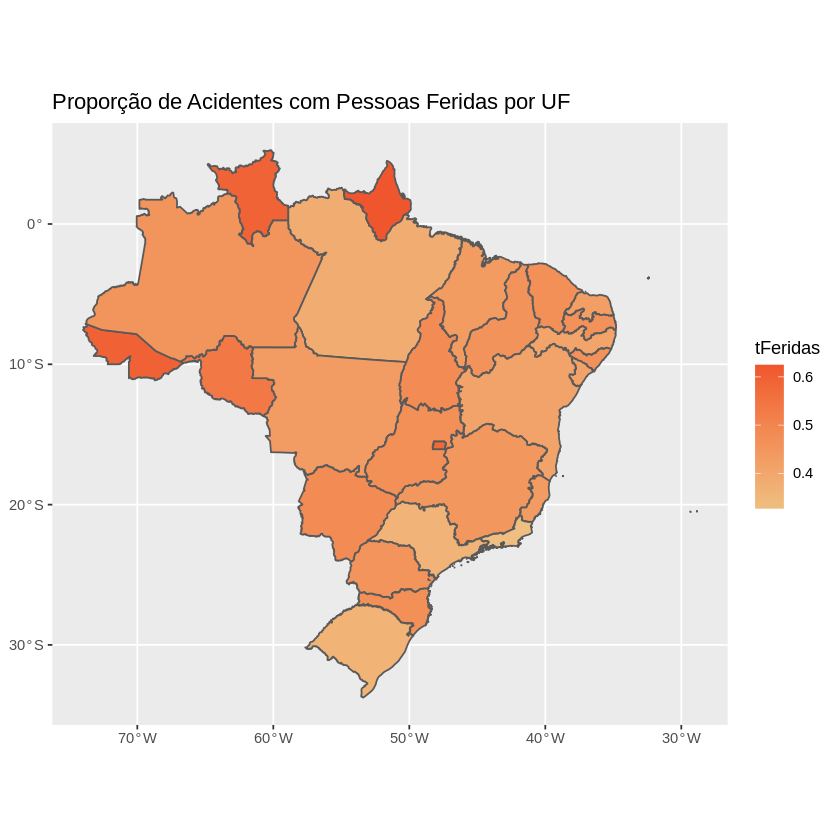

In [ ]:
ggplot() + geom_sf(data = base_mapa , aes(fill = tFeridas)) + scale_fill_gradient(low ="#EFBE81" , high = "#EF562D") + labs(title = "Proporção de Acidentes com Pessoas Feridas por UF")

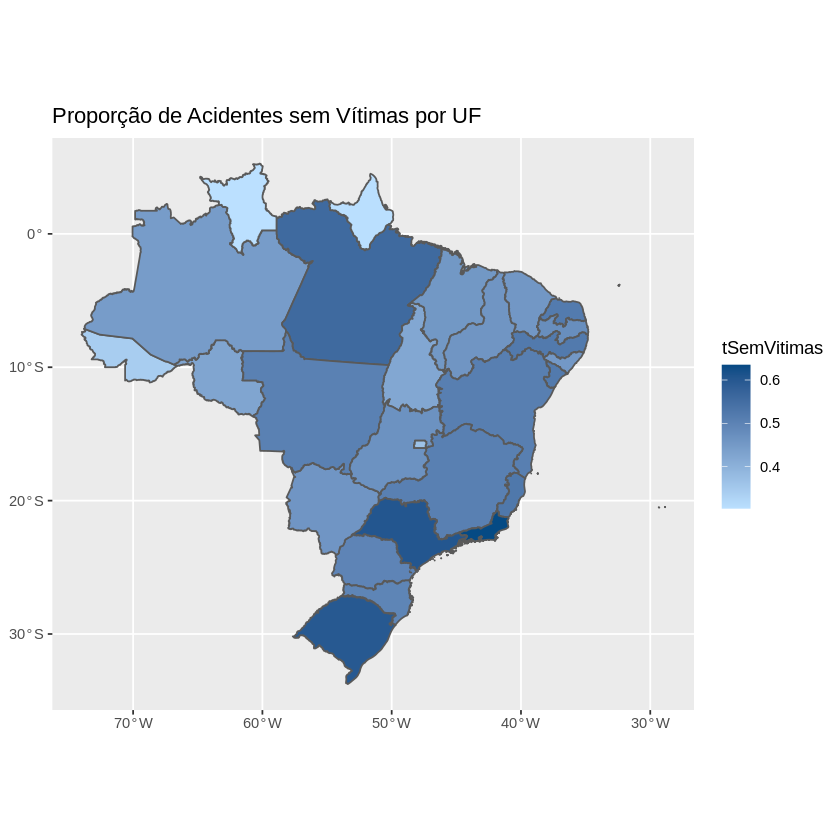

In [ ]:
ggplot() + geom_sf(data = base_mapa , aes(fill = tSemVitimas)) + scale_fill_gradient(low ="#BBE0FF" , high ="#054A84" ) + labs(title = "Proporção de Acidentes sem Vítimas por UF")

In [ ]:
# Score para as identidades (BR-mun) > antees de aplicar os rotulos, calcular os tipos de acidentes ocorridos e suas respectivas proporcoes,
# o score de multiplicacao sera aplicado a proporcao e havera um ajuste baseado no volume de acidentes (acidentes ~ populacao)

In [ ]:
BRS_MUN <- acidentes %>% group_by(br, municipio) %>% summarise(Acidentes = n(), Pessoas = sum(pessoas), Veiculos = sum(veiculos),
Ilesos = sum(ilesos), Feridos = sum(feridos), Graves = sum(feridos_graves), Mortos = sum(mortos), ignorados = sum(ignorados),
tSemVitimas = sum(classificacao_acidente == "Sem Vítimas"),tFeridas = sum(classificacao_acidente == "Com Vítimas Feridas"),
tFatais = sum(classificacao_acidente == "Com Vítimas Fatais"),tIgnorado = sum(classificacao_acidente == "Ignorado")) %>% mutate(PropFeridosGrave = Graves/Feridos) %>%
mutate(across(11:14, ~ . / Acidentes)) %>% ungroup() %>% select(-Graves) %>% mutate(Score = tSemVitimas + tIgnorado + tFeridas * 5 + tFatais * 10) %>% mutate(ScoreAdj = Score/Acidentes, BrMun = paste(br, municipio, sep = "_" )) %>%
arrange(desc(Score))

`summarise()` has grouped output by 'br'. You can override using the `.groups` argument.



In [ ]:
head(BRS_MUN)

br,municipio,Acidentes,Pessoas,Veiculos,Ilesos,Feridos,Mortos,ignorados,tSemVitimas,tFeridas,tFatais,tIgnorado,PropFeridosGrave,Score,ScoreAdj,BrMun
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
101,SERRA,18260,40993,36581,28485,9700,421,2386,11058,0.37,0.019,0.0053,0.0000199,11060,0.61,101_SERRA
381,BETIM,17487,39611,35043,29178,8970,312,1148,10964,0.35,0.016,0.0041,0.0000106,10966,0.63,381_BETIM
40,DUQUE DE CAXIAS,16110,34664,29570,25181,7492,361,1628,10811,0.30,0.021,0.0053,0.0000101,10813,0.67,40_DUQUE DE CAXIAS
116,GUARULHOS,18213,41049,36655,27132,10171,443,3302,10055,0.42,0.023,0.0049,0.0000059,10057,0.55,116_GUARULHOS
101,SAO JOSE,18385,40160,36802,27526,10780,204,1649,9705,0.46,0.010,0.0052,0.0000097,9707,0.53,101_SAO JOSE
316,ANANINDEUA,11403,25866,23658,20145,4408,173,1140,7980,0.28,0.015,0.0023,0.0000231,7982,0.70,316_ANANINDEUA


In [ ]:
quantile(BRS_MUN$Acidentes, seq(0,1,0.1))

0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
    1     1     1     2     6    35   126   269   550  1232 18385

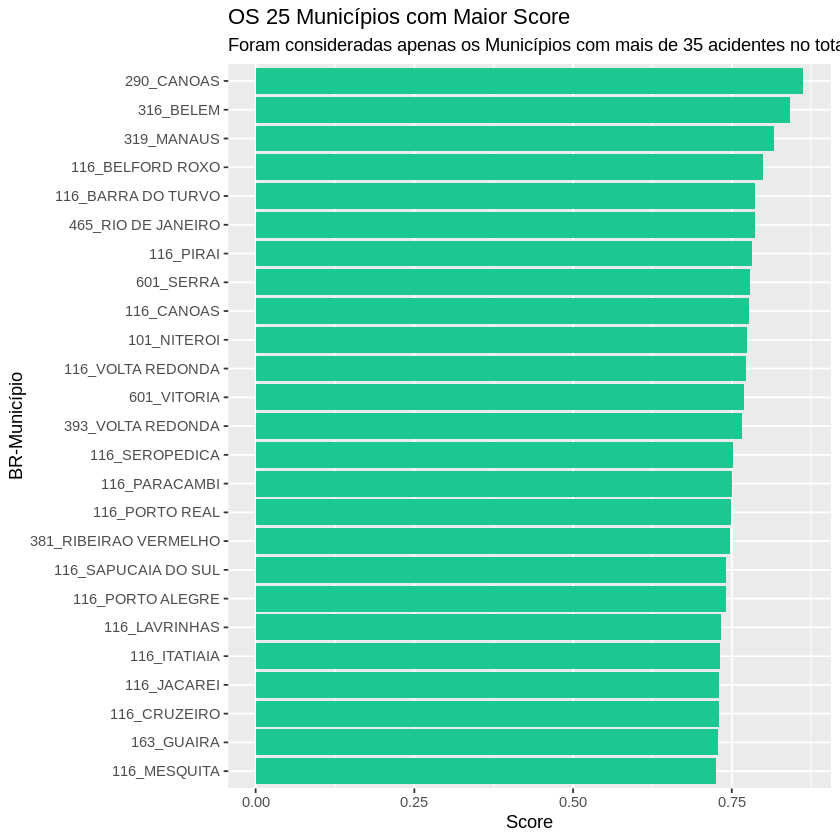

In [ ]:
BRS_MUN %>% filter(Acidentes > 35) %>% top_n(25, ScoreAdj) %>% arrange(desc(ScoreAdj)) %>% ungroup() %>% mutate(BrMun2 = fct_reorder(BrMun, ScoreAdj)) %>%
ggplot(aes(x = BrMun2, y = ScoreAdj)) + geom_col(fill = "#1DC792") + coord_flip() + labs(x = "BR-Município", y = "Score", title = "OS 25 Municípios com Maior Score",
subtitle = "Foram consideradas apenas os Municípios com mais de 35 acidentes no total")

# Modelagem - Previsao do Risco do Acidente

In [ ]:
acidentes <- acidentes %>% mutate(Desfecho_acidente = ifelse(mortos + feridos > 0,"1","0"),
BrMun = paste(br, municipio, sep = "_")) #prestar atencao na proporcao, ja que possivelmente
# possa ter sido alterada devido aos filtros e remocao de NAs

In [ ]:
Scores <- BRS_MUN %>% select(BrMun, ScoreAdj)

In [ ]:
acidentes <- left_join(acidentes, Scores, by = "BrMun")

In [ ]:
head(acidentes)

In [ ]:
names(acidentes)

In [ ]:
acidentes_modelling <- acidentes %>% select(1,3,4,12,13,14,15,16,17,36,38) %>% mutate(Final_Semana = ifelse(dia_semana == "6.sábado",1,ifelse(dia_semana == "7.domingo",1,0)))

In [ ]:
head(acidentes_modelling)

In [ ]:
acidentes_modelling <- acidentes_modelling %>% select(-c(2,3))

In [ ]:
# Espaço para holdout  >>> #Score possivelmente influencia bastante (ele é uma composicao linear do objetivo a ser atingido)

In [ ]:
table(acidentes_modelling$Desfecho_acidente)

In [ ]:
# corrigindo o tipo das variaveis
acidentes_modelling[,c(2:8,10)] <- lapply(acidentes_modelling[,c(2:8,10)], function(x){as.factor(x)})

In [ ]:
#reduzindo a amostragem por ela ser muito alta e custar muito processamento
samples <- acidentes_modelling$Desfecho_acidente %>% createDataPartition(p = 0.02, list = FALSE)
model_df <- acidentes_modelling[samples,]

In [ ]:
#fazendo o verdadeiro holdout dos dados a serem testados
train_samples <- model_df$Desfecho_acidente %>% createDataPartition(p = 0.75,list = FALSE)
train_data <- model_df[train_samples,] %>% select(2:7,9:10,8)
test_data <- model_df[-train_samples,] %>% select(2:7,9:10,8)

In [ ]:
head(train_data)

In [ ]:
# Modelagem 1 - Regressao Logistica

In [ ]:
reg1 <- glm(Desfecho_acidente ~ ., data = train_data, family = binomial)

In [ ]:
summary(reg1)

In [ ]:
pred1 <- predict(reg1,test_data[,-9])

In [ ]:
pred1 <- ifelse(pred1 > 0.5,1,0)

In [ ]:
table(test_data[,9],pred1) %>% confusionMatrix()

In [ ]:
# Modelagem 2 - SVM

In [ ]:
reg2 <- svm(Desfecho_acidente ~., data = train_data, kernel = "linear", type = "C-classification")

In [ ]:
pred2 <- predict(reg2, newdata = test_data[,-9])

In [ ]:
table(test_data[,9], pred2) %>% confusionMatrix()

In [ ]:
# Modelagem 3 - Decision Tree

In [ ]:
reg3 <- rpart(Desfecho_acidente ~., data = train_data)

In [ ]:
pred3 <- predict(reg3, newdata = test_data[,-9])

In [ ]:
pred3 <- pred3 %>% as.data.frame()
colnames(pred3) <- c("zero","one")
pred3 <- pred3 %>% mutate(result = ifelse(zero > one, 0,1))

In [ ]:
table(test_data$Desfecho_acidente,pred3$result) %>% confusionMatrix()

In [ ]:
# Modelagem 4 - Random Forest

In [ ]:
reg4 <- randomForest(Desfecho_acidente ~., data = train_data, ntree = 100)

In [ ]:
pred4 <- predict(reg4, newdata = test_data[,-9])

In [ ]:
table(test_data[,9], pred4) %>% confusionMatrix()

In [ ]:
# Novas classificacoes

# SVM
# Decision Tree
# Random Forest
# H20 (deep learning - testar novos frameworks - keras e pytorch)